## Small Wine Dataset

In [2]:
from sklearn.datasets import load_wine 
wine_dataset = load_wine()

In [3]:
print("Keys of wine_dataset are : {}".format(wine_dataset.keys()))

Keys of wine_dataset are : dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [4]:
print("Description of the wine_dataset:\n {}".format(wine_dataset['DESCR']))

Description of the wine_dataset:
 .. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:          

In [5]:
import pandas as pd
wine_dataframe = pd.DataFrame(wine_dataset['data'], columns=wine_dataset.feature_names)
wine_dataframe['target'] = wine_dataset['target']
wine_dataframe.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
wine_dataframe.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [7]:
wine_dataframe['target'].value_counts().sort_index()

target
0    59
1    71
2    48
Name: count, dtype: int64

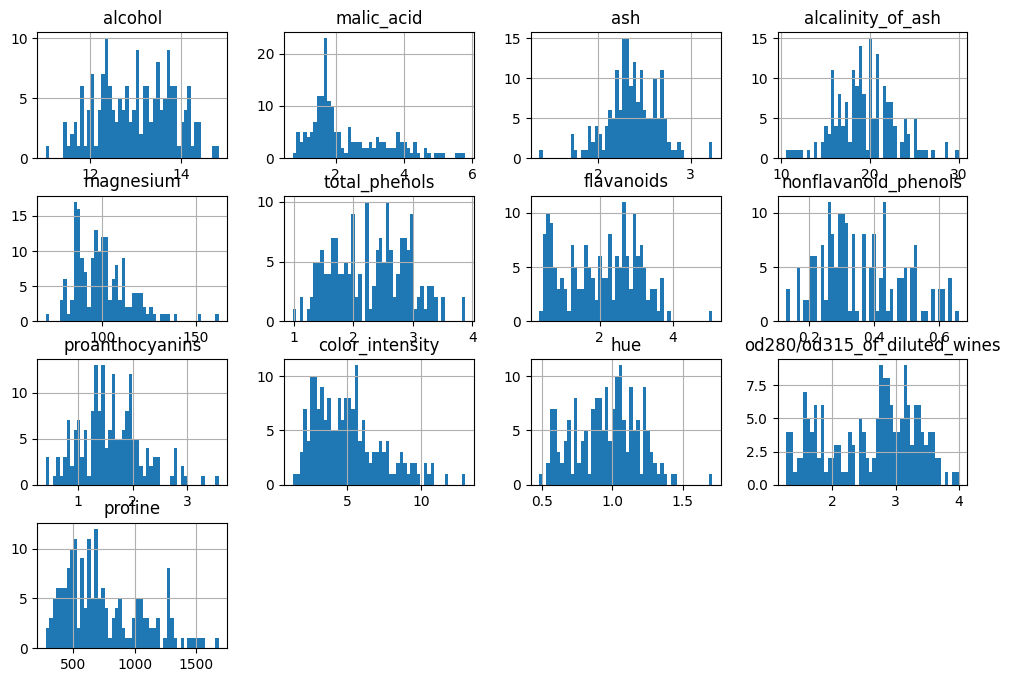

In [8]:
import matplotlib.pyplot as plt
# Select all columns except 'target'
features = wine_dataframe.drop(columns='target')

# Plot histograms for features only
features.hist(bins=50, figsize=(12, 8))
plt.show()

In [9]:
wine_dataframe = wine_dataframe[wine_dataframe['target'] != 1]
wine_dataframe['target'].value_counts().sort_index()

target
0    59
2    48
Name: count, dtype: int64

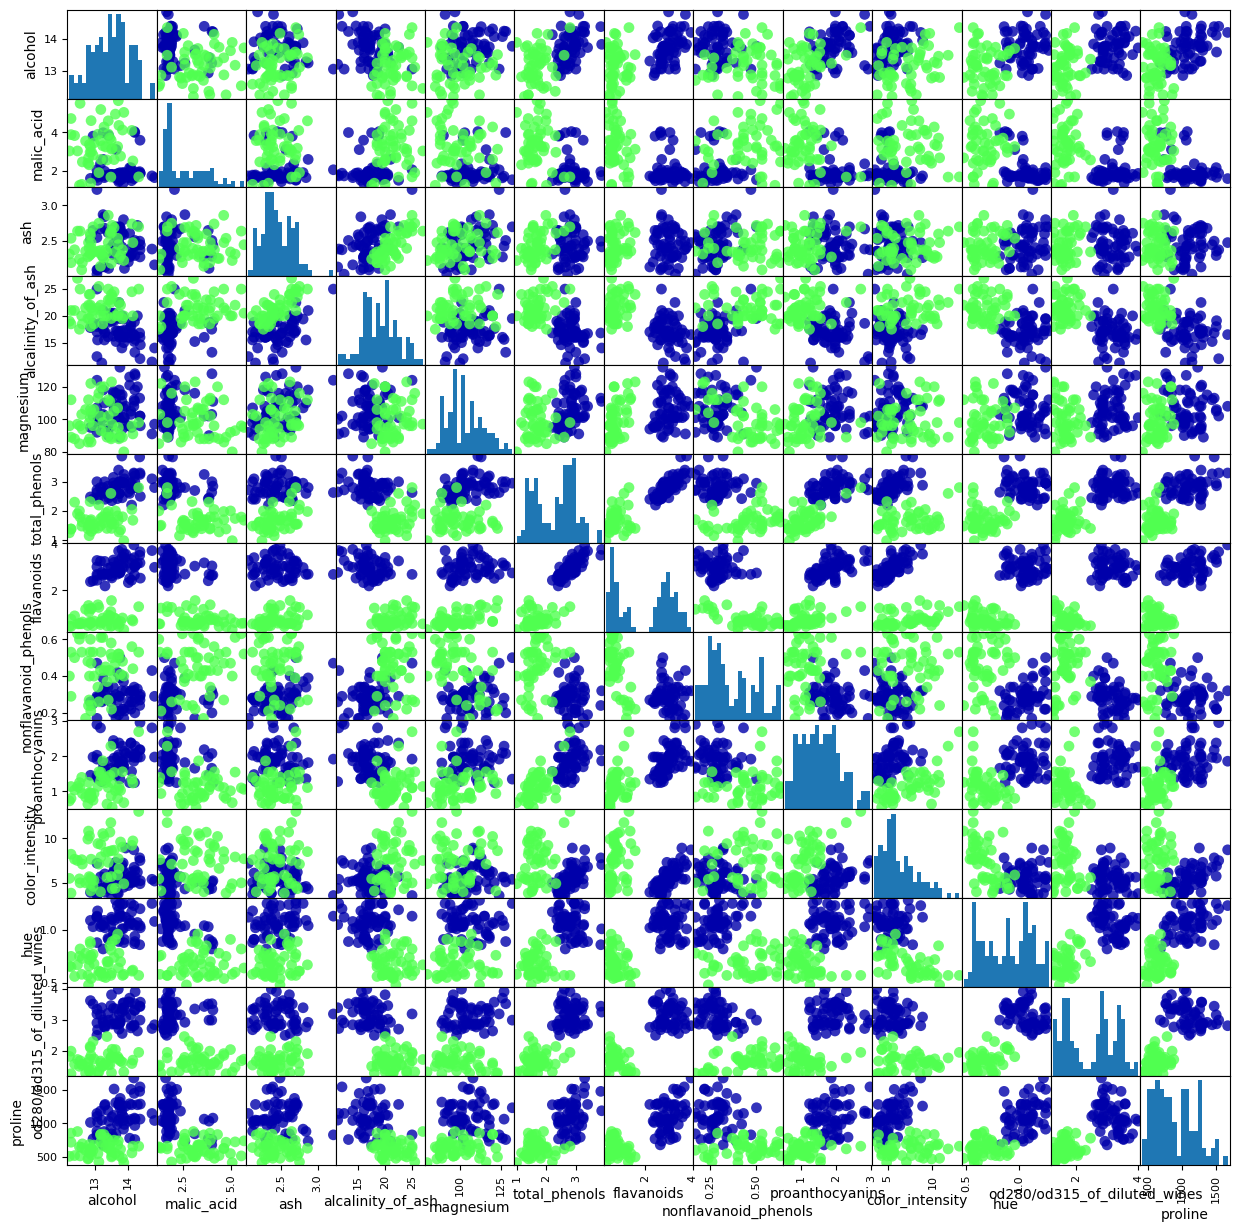

In [10]:
from pandas.plotting import scatter_matrix 
import mglearn
scatter_matrix(wine_dataframe.iloc[:, :-1], c=wine_dataframe['target'], figsize=(15,15), marker='o',hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)
plt.show()

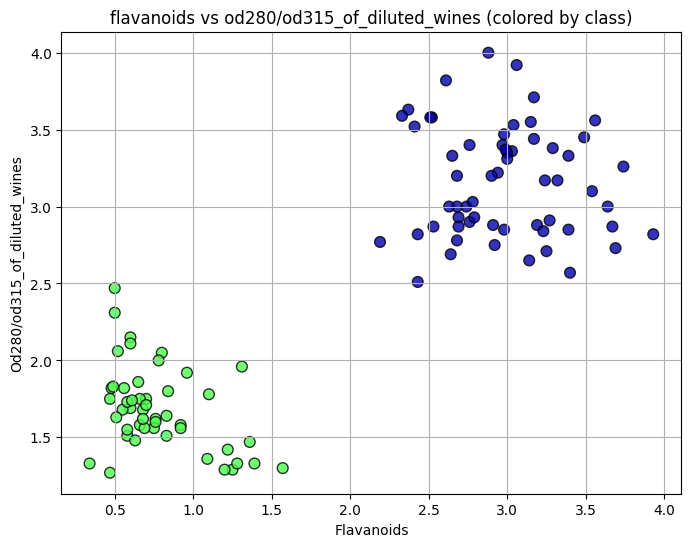

In [11]:
import matplotlib.pyplot as plt

# Choose your two features
x_feature = 'flavanoids'
y_feature = 'od280/od315_of_diluted_wines'

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(
    wine_dataframe[x_feature],
    wine_dataframe[y_feature],
    c=wine_dataframe['target'],     # color by class
    cmap=mglearn.cm3,               # or 'bwr', 'coolwarm', etc.
    s=60,
    alpha=0.8,
    edgecolor='k'
)

plt.xlabel(x_feature.capitalize())
plt.ylabel(y_feature.capitalize())
plt.title(f'{x_feature} vs {y_feature} (colored by class)')
plt.grid(True)
plt.show()

In [12]:
corr_matrix = wine_dataframe.corr()
corr_matrix['target'].sort_values(ascending=False)

target                          1.000000
alcalinity_of_ash               0.672220
nonflavanoid_phenols            0.627869
malic_acid                      0.598243
color_intensity                 0.462182
ash                            -0.044374
magnesium                      -0.313753
alcohol                        -0.515072
proanthocyanins                -0.673770
proline                        -0.801851
hue                            -0.854897
total_phenols                  -0.859260
od280/od315_of_diluted_wines   -0.917063
flavanoids                     -0.952140
Name: target, dtype: float64

<Figure size 1000x800 with 0 Axes>

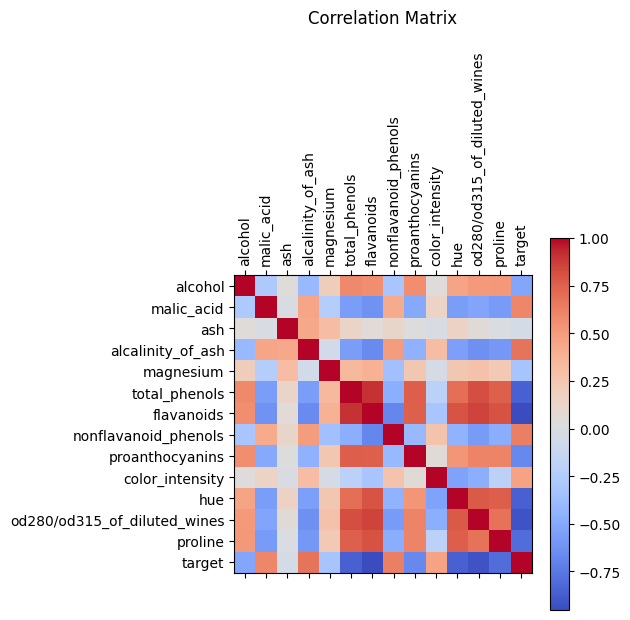

In [13]:
# Step 1: plot using matshow
plt.figure(figsize=(10, 8))
plt.matshow(corr_matrix, cmap='coolwarm')  # 'coolwarm' = red/blue color scale
plt.colorbar()  # adds the scale on the side

# Step 2: add feature names as tick labels
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

# Optional: title
plt.title("Correlation Matrix", pad=20)
plt.show()

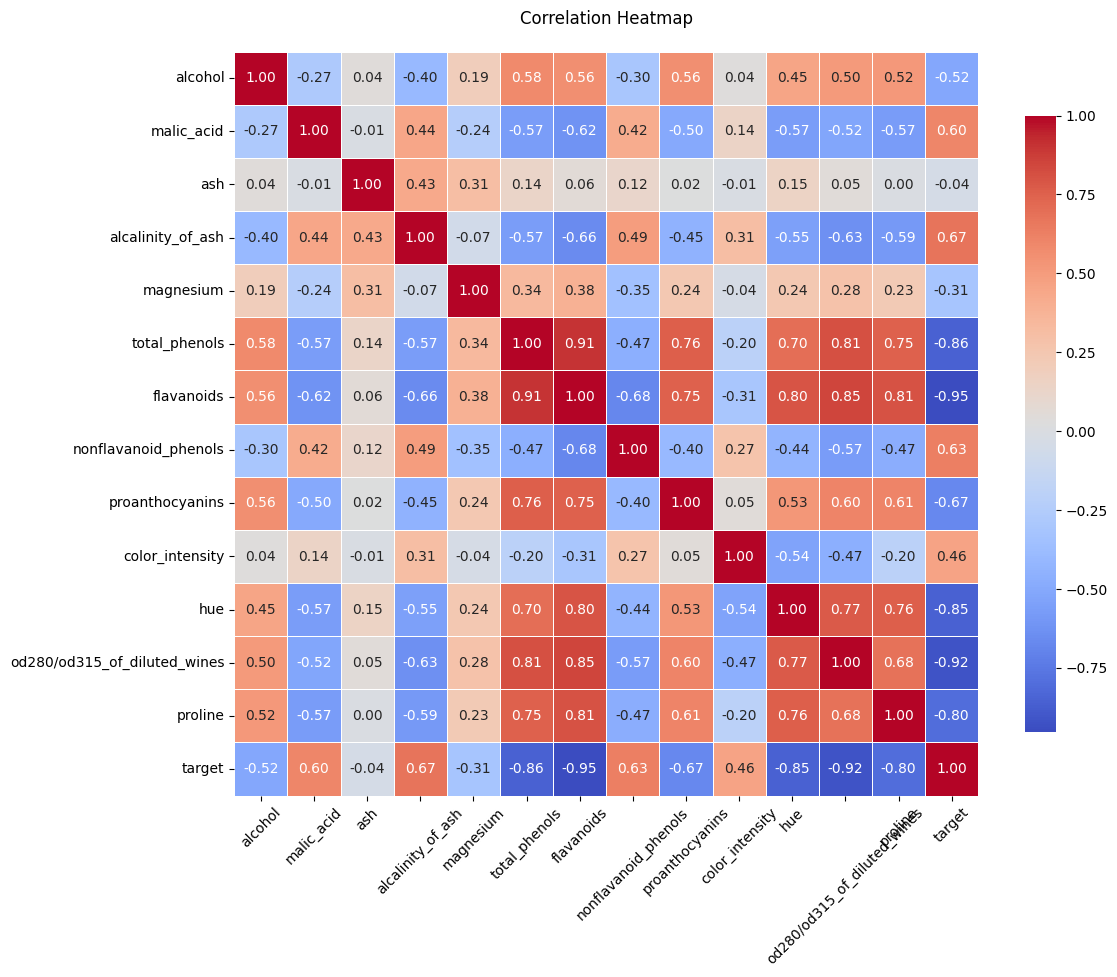

In [14]:
import seaborn as sns

# Step 1: plot it using seaborn heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
            annot=True,            # show the correlation values in the boxes
            fmt=".2f",             # format numbers to 2 decimal places
            cmap="coolwarm",       # color scale
            square=True,           # make cells square
            linewidths=0.5,        # lines between cells
            cbar_kws={"shrink": 0.8})  # shrink color bar

plt.title("Correlation Heatmap", pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

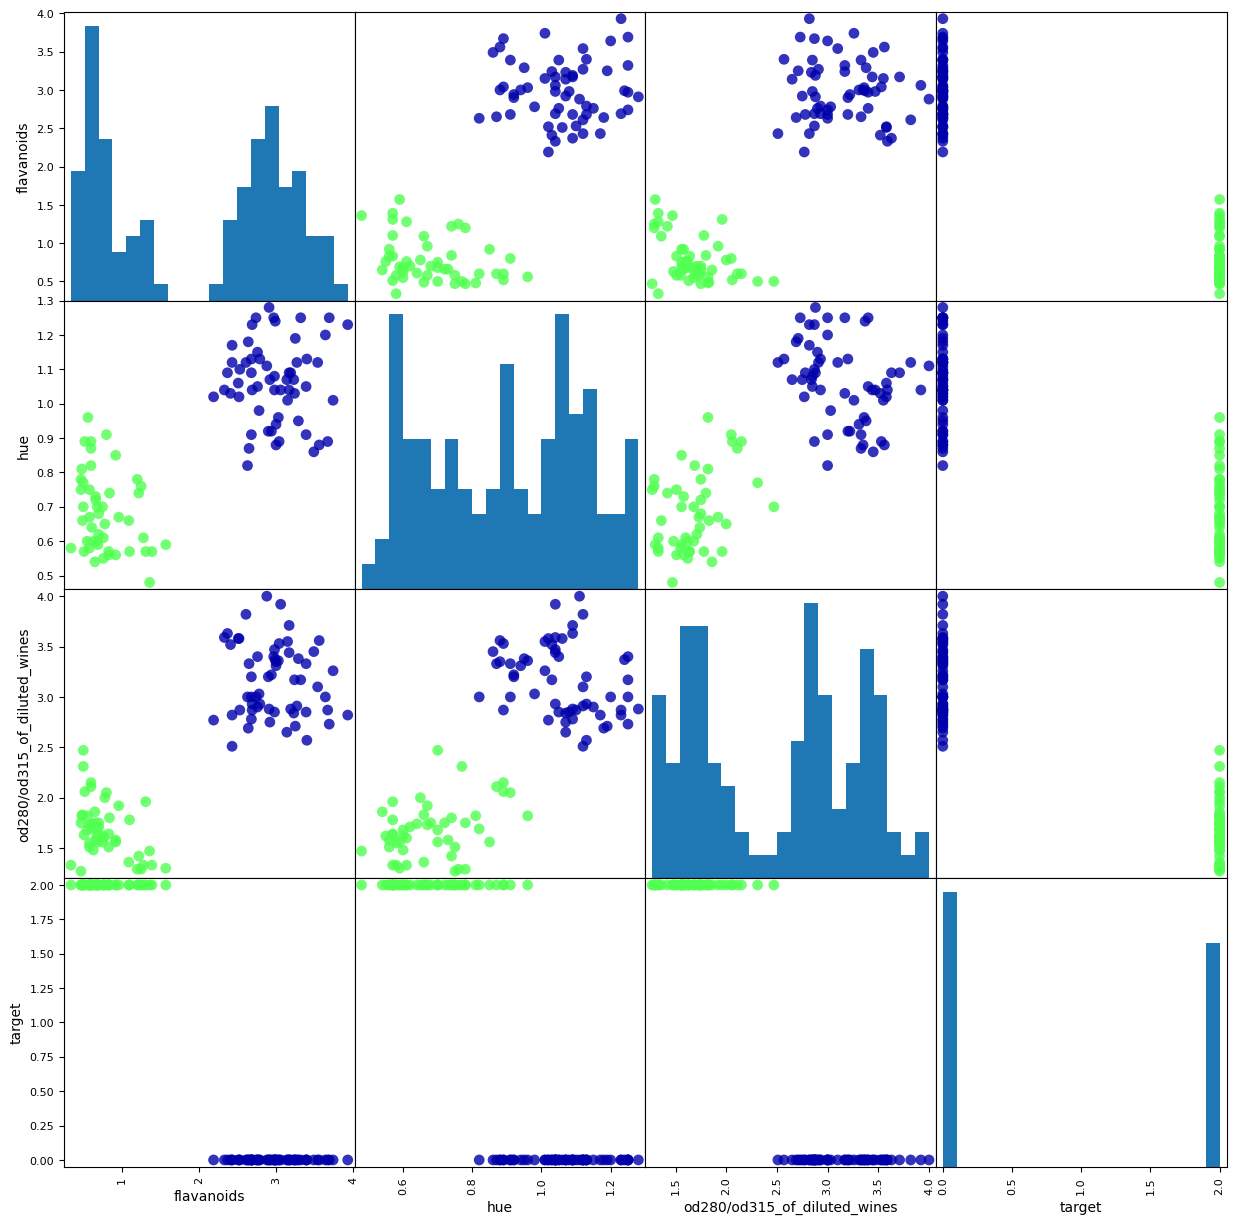

In [18]:
variables = ['flavanoids','hue','od280/od315_of_diluted_wines','target']
scatter_matrix(wine_dataframe[variables], c=wine_dataframe['target'], figsize=(15,15), marker='o',hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)
plt.show()